# Sentiment Analysis of Movie Reviews:
Here we will be analysing if the given `movie review` is a positive review or a negative review, based on its context. We having a .csv file with around 2000 movie reviews. We will analyse them and will perform sentiment analysis on them.


## Analysing file and creating DTM:

In [9]:
import pandas as pd
path = "Data/data_set/User_Reviews/User_Reviews/User_movie_review.csv"
input_data = pd.read_csv(path)

In [10]:
input_data.head()

,class,text
0,Pos,stuart little is one of the best family ...
1,Neg,a movie like mortal kombat annihilation wor...
2,Neg,and just when you thought joblo was getting a...
3,Pos,every now and then a movie comes along from a...
4,Neg,for about twenty minutes into mission impossi...


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
sparse_matrix = count_vector.fit_transform(input_data["text"])
dtm = pd.DataFrame(sparse_matrix.toarray(), columns=count_vector.get_feature_names())

In [28]:
dtm.head()

,00,000,0009f,007,00s,03,04,05,05425,10,...,zukovsky,zulu,zundel,zurg,zus,zweibel,zwick,zwigoff,zycie,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see, there are `39363` columns in above document term matrix. Not all columns are relevant for our analysis. There may be some redundant words and some stop words as well. We need to remove the stop words and preprocess the data before creating `document term matrix`

## Cleaning and preprocessing:

In [47]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
stemmer = PorterStemmer()

In [53]:
def tokenize(text):
    text = re.sub(r'\W+|\d+|_',' ',text)
    text_token = word_tokenize(text)
    text_token = [stemmer.stem(w) for w in text_token]
    return text_token

count_vector = CountVectorizer(min_df=5,tokenizer=tokenize,stop_words=stopwords.words("english"))
sparse_matrix = count_vector.fit_transform(input_data["text"])
dtm_new = pd.DataFrame(sparse_matrix.toarray(), columns = count_vector.get_feature_names(), index=None)

In [54]:
dtm_new.head()

,aaron,abandon,abbi,abduct,abel,abil,abl,abli,aboard,abod,...,zip,zipper,zoe,zombi,zone,zoo,zoom,zorro,zucker,zwick
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So now, we have `9470` columns which is around 4 times lesser than the number of columns we got in previous document term matrix. So for now preprocessing looks fine. 

## Creating model:

In [58]:
# adding class columns from input_data
# so as to identify pos or neg review
dtm_new["class"] = input_data["class"]
dtm_new["class"].head()

0    Pos
1    Neg
2    Neg
3    Pos
4    Neg
Name: class, dtype: object

In [60]:
train = dtm_new[:1900]
test = dtm_new[1900:]
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
X_train = train.drop(["class"],axis=1)
y_train = train["class"]
clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [62]:
#current accuracy score of model 
clf.score(X_train,y_train)

0.9326315789473684

In [63]:
X_test = test.drop(["class"],axis=1)
y_test = test["class"]
pred_sentiment = clf.predict(X_test)

In [67]:
# calculating accuracy using X_test and actual_value ie y_test
clf.score(X_test,y_test)

0.79

We can see the accuracy from above model is `79%`. This may or may not be suitable for our requirement. Above we see that the accuracy for **train** data is `93%` . So it seems like our model is overfitted. Let's check the predicted result and see the accuracy in other way.

In [69]:
test["predicted_class"] = pred_sentiment

A:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
test[["class","predicted_class"]].head(10)

,class,predicted_class
1900,Pos,Pos
1901,Pos,Pos
1902,Pos,Pos
1903,Pos,Neg
1904,Pos,Neg
1905,Neg,Neg
1906,Neg,Neg
1907,Neg,Neg
1908,Neg,Neg
1909,Neg,Neg


In [75]:
pd.Series(test["class"]==test["predicted_class"]).value_counts(normalize=True)

True     0.79
False    0.21
dtype: float64

## Plotting and analysing further:

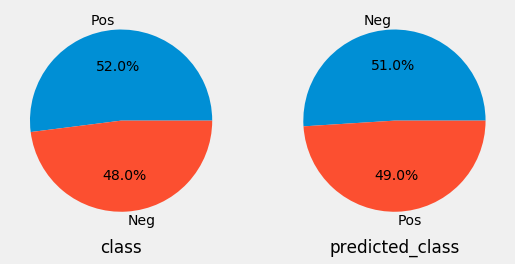

In [104]:
# predicting for actual review in test data
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
pd.Series(test["class"].value_counts(normalize=True)).plot(kind="pie", autopct="%.1f%%",ax=ax1)
pd.Series(test["predicted_class"].value_counts(normalize=True)).plot(kind="pie", autopct="%.1f%%", ax=ax2)
ax1.set_xlabel("class")
ax1.set_ylabel("")
ax2.set_xlabel("predicted_class")
ax2.set_ylabel("")
plt.show()


## Conclusion:

Accuracy seems okay, if we compare the actual and predicted sentiment for the reviews from test data. Although we can still get better accuracy by preprocessing the data futher by adding more stop words and modifying our document term matrix further. The more we will be able to preprocess our document term matrix, the more accuracy we will be able to achieve using Naive Bayes Model.